## CS 506 Spring 2021 - HW2 
### Classification and Dimensionality Reduction (Total: 32 points)
#### Package Limitations: None

#### Name: Dawei Wang
#### BU ID:U65522424
#### BU Email: wangd30@bu.edu

#### People you consulted working on this hw: Sarinna





### 1. Least Squares and Logistic Regression

In this section, we are going to compare two linear models for classification, especially when outliers are presented in the data. Please refer to Section 4.1.3 at Page 184 of the book [Pattern Recognition and Machine Learning](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf) for the context of this problem as well as the explanation of Figure1

Figure 1: The comparison of least square and logistic regression in classification of two classes with/without outliers

![Figure 1](./resource/figure1.jpg)

a) \[1 pt.\] Generate labeled random 2D points like the ones shown in the left subfigure of Figure1. Note that the red crosses and blue circles are points of different classes, so you may need to have a third column storing the label info of the 2D points. Let’s call this data “data without outlier”. Now on top of this data, add a few outliers to the blue circles just like the right subfigure of Figure1 and save the data as “data with outlier”. You may either use code or even manually choose some random 2D points. Your data need not to be exactly the same as the ones shown on the plots.

In [ ]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

from typing import List, Dict, Tuple

from tqdm import tqdm
from datetime import datetime

import matplotlib.pyplot as plt 
%matplotlib inline 

In [ ]:
# feel free to write more helper function, but do NOT change the name of the provided function(s). 
# you may modify inputs and outputs of provided functions. If you do, make sure to indicate
# what the they are in the function docstring. This applies to every cells below
def generate_random_points(with_outlier, plot=True):
    """
    Generate a few random points and return such dataset
    
    :param with_outlier: whether outlier is generated with the data points
    :return: dataset object (type of your choice)
    """
    feature_data1 = []
    feature_data2 = []
    
    # create class 0 x data with normal distribution mean -2 and std 1 
    red_x = np.random.normal(loc=-2, scale=1, size=(50, ))
    # move x data up to create y data, add noise 
    red_y = (red_x + 3) + np.random.normal(loc=0, scale=.8, size=(50, ))
    feature_data1.extend(red_x)
    feature_data2.extend(red_y)
    
    # create class 1 x data with normal distribution mean .5 and std 1 
    blue_x = np.random.normal(loc=.5, scale=1, size=(50, ))
    # move x data down to create y data, add noise 
    blue_y = (blue_x - 3) + np.random.normal(loc=0, scale=.8, size=(50, ))
    feature_data1.extend(blue_x)
    feature_data2.extend(blue_y)
    
    plt.figure(figsize=(5, 5)) if plot else None 
    if with_outlier: 
        # get totally random x and y for outlier, with specified config 
        outlier_blue_x = np.random.normal(loc=6, scale=.8, size=(20, ))
        outlier_blue_y = np.random.normal(loc=-6, scale=.8, size=(20, ))
        plt.scatter(outlier_blue_x, outlier_blue_y, color='blue') if plot else None 
        feature_data1.extend(outlier_blue_x)
        feature_data2.extend(outlier_blue_y)
    
    if plot:
        plt.scatter(red_x, red_y, color='red')
        plt.scatter(blue_x, blue_y, color='blue')

        plt.xlim(-4, 8)
        plt.ylim(-8, 4)
        plt.show()

    feature_data1 = np.array(feature_data1).reshape((-1, 1))
    feature_data2 = np.array(feature_data2).reshape((-1, 1))
    feature_data = np.concatenate([feature_data1, feature_data2], axis=1)
    target_data = [0] * 50 + [1] * (70 if with_outlier else 50)
    target_data = np.array(target_data).reshape((-1, 1))
    return feature_data, target_data

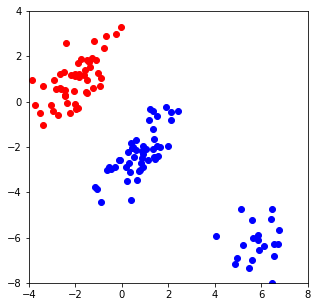

In [ ]:
# Do some test print outs to verify correctness
feature, target = generate_random_points(True)

In [ ]:
model = LinearRegression().fit(feature, target.ravel())
accuracy_score(target, model.predict(feature).round())

0.9833333333333333

In [ ]:
model = LogisticRegression().fit(feature, target.ravel())
accuracy_score(target, model.predict(feature).round())

1.0

b) \[4 pts.\] Use both the least squares method and the logistic regression method to classify the “data without outlier” and “data with outlier”.

In [ ]:
def least_squares_classify(feature, target):
    """
    Classifying dataset with least squares method
    
    :param dataset: the dataset object to classify
    :return: 
    """
    model = LinearRegression().fit(feature, target)
    prediction = model.predict(feature).round()
    
    print(f'least square accuracy: {accuracy_score(target, prediction)}')
    return prediction


def logistic_classify(feature, target): 
    model = LogisticRegression().fit(feature, target.ravel())
    prediction = model.predict(feature).round()
    
    print(f'logistic accuracy: {accuracy_score(target, prediction)}')
    return prediction

In [ ]:
# Do some test print outs to verify correctness
feature_without_outlier, target_without_outlier = generate_random_points(False, plot=False)
without_outlier_prediction = least_squares_classify(feature_without_outlier, target_without_outlier)

least square accuracy: 1.0


In [ ]:
# Do some test print outs to verify correctness
feature_with_outlier, target_with_outlier = generate_random_points(True, plot=False)
outlier_prediction = least_squares_classify(feature_with_outlier, target_with_outlier)

least square accuracy: 0.9833333333333333


c) \[2 pts.\] Plot the classification results into two figures side by side just like Figure1. Have you got similar results like Figure1? Explain briefly why the logistic regression is not sensitive to outliers.

In [ ]:
def plot_classification_results(agg_feature, agg_prediction, agg_title):
    """
    Plot classification results of data with outlier and data without outlier
    
    :param: 
    :return: 
    """
    plt.figure(figsize=(10, 5))
    # enumerate return (index, data)
    # data is from zip(list1, list2, list3)
    # hence len(data) == 3, 
    for index, (feature, prediction, title) in enumerate(
            zip(agg_feature, agg_prediction, agg_title)):
        # create subplot with 1 row, 2 columns, and current index 
        # since index from enumerate starts with 0, hence add 1 to start from 1 
        plt.subplot(1, 2, index+1)
        for class_ in [0, 1]: 
            # select features with predicted label as class_, and color accordingly 
            dataset = feature[prediction.flatten() == class_ , :]
            plt.scatter(dataset[:, 0], dataset[:, 1], color=('blue' if class_ else 'red'))
        # add title, x/y axis range 
        plt.title(title)
        plt.xlim(-4, 8)
        plt.ylim(-8, 4)
    return None 

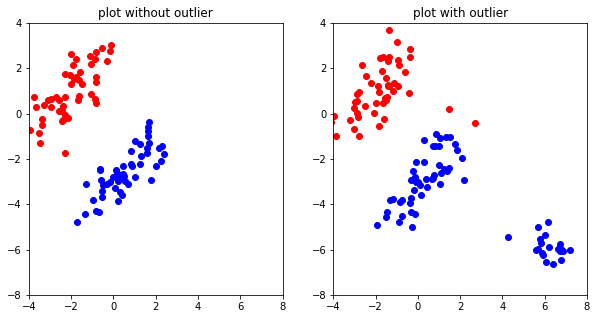

In [ ]:
plot_classification_results([feature_without_outlier, feature_with_outlier], [without_outlier_prediction, outlier_prediction], ['plot without outlier', 'plot with outlier'])

In [ ]:
# Do some test print outs to verify correctness
feature_without_outlier, target_without_outlier = generate_random_points(False, plot=False)
without_outlier_prediction = logistic_classify(feature_without_outlier, target_without_outlier)

logistic accuracy: 1.0


In [ ]:
# Do some test print outs to verify correctness
feature_with_outlier, target_with_outlier = generate_random_points(True, plot=False)
outlier_prediction = logistic_classify(feature_with_outlier, target_with_outlier)

logistic accuracy: 1.0


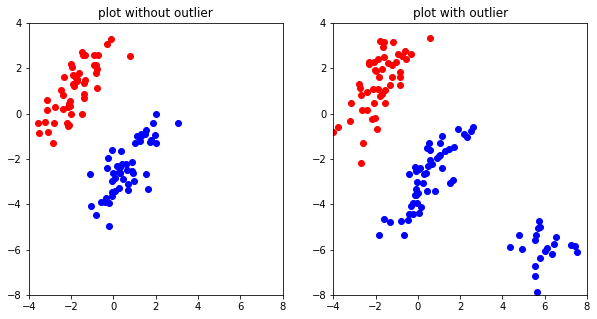

In [ ]:
plot_classification_results([feature_without_outlier, feature_with_outlier], [without_outlier_prediction, outlier_prediction], ['plot without outlier', 'plot with outlier'])

### 2 Logistic Regression and kNN Classification

The goal of this problem is to perform classification on the famous MNIST dataset.

We have already preprocessed a sample of this dataset (30% of the original dataset), that you can find here: [Download from Google Drive](https://drive.google.com/open?id=1phX7-hv5FNye7mPzddr1oplZIhAgmycz) in the format of NumPy arrays.

File mnist data.npy contains an array of the data -each row corresponds to a 28 × 28 digit picture vectorized to create 28*28=784 features, while the file mnist labels.npy contains the respective labels of the images.

a) \[0 pts.\] Randomly split the dataset, using 20% of the samples as your test set and the remaining 80% as the train set that you will use to fit your models.

In [ ]:
def read_mnist_data(feature_path, target_path, test_size=0.2) -> np.array:
    """
    Load numpy array of MNIST dataset from data.npy file
    
    :param file_path: string path to dataset 
    :return: numpy array representation of the mnist dataset
    """
    feature, target = np.load(feature_path), np.load(target_path)
    return train_test_split(feature, target, test_size=test_size)

In [ ]:
all_data= read_mnist_data('mnist_data.npy', 'mnist_labels.npy')


b) \[2 pts.\] Try to classify the images using Logistic Regression. Have in mind that the dataset contains more than 2 labels, hence is a multinomial classification problem. What is your train accuracy and test accuracy?

In [ ]:
def logistic_regression_classify_mnist(train_feature, test_feature, train_target, test_target, max_iter=100):
    """
    Classify mnist dataset with logistic regression
    
    :param dataset: mnist dataset in numpy format
    :return: train and test accuracy of the model
    """
    model = LogisticRegression(max_iter=max_iter, multi_class='multinomial', n_jobs=-1).fit(train_feature, train_target)
    train_prediction = model.predict(train_feature)
    test_prediction = model.predict(test_feature)
    print(f'train accuracy: {accuracy_score(train_target.flatten(), train_prediction.flatten())}')
    print(f' test accuracy: {accuracy_score(test_target.flatten(), test_prediction.flatten())}')
    return None 

In [ ]:
logistic_regression_classify_mnist(*all_data)

train accuracy: 0.9575
 test accuracy: 0.8941666666666667


In [18]:
logistic_regression_classify_mnist(*all_data, max_iter=1_000)

c) \[3 pts.\] Now, try to classify the dataset using a k-Nearest Neighbor classifier. Plot the train and test accuracy as you vary k from 1 to 25 with a step size of 2.


In [ ]:
def knn_classify_mnist(train_feature, test_feature, train_target, test_target, neighbors=5):
    """
    Classify mnist dataset with K-nearest neighbor
    
    :param dataset: mnist dataset in numpy format
    :return: train and test accuracy of the model
    """
    model = KNeighborsClassifier(n_neighbors=neighbors, n_jobs=-1).fit(train_feature, train_target)
    train_prediction = model.predict(train_feature)
    test_prediction = model.predict(test_feature)
    return accuracy_score(train_target.flatten(), train_prediction.flatten()), accuracy_score(test_target.flatten(), test_prediction.flatten())

In [ ]:
train_record, test_record = [], [] 
for neighbors in tqdm(range(1, 30, 2), ncols=100):
    train_score, test_score = knn_classify_mnist(*all_data, neighbors=neighbors)
    train_record.append(train_score)
    test_record.append(test_score)

 13%|████████▌                                                       | 2/15 [01:57<12:14, 56.49s/it]

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 30, 2), train_record, color='red', label='train accuracy')
plt.plot(range(1, 30, 2), test_record, color='blue', label='test accuracy')
plt.xlabel('neighbors')
plt.ylabel('accuracy')
plt.title('training and testing accuracy vs neighbors')
plt.axvline(3, color='black')
plt.legend()

d) \[1 pt.\] Explain your results.


1. as number of neighbors increase, both training and testing performance decrease. as neighbor increase, more instances are being considered, making a more generalized prediction. 
2. gap between training and testing decrease, signaling a increase in generalizability, though performance suffers. 
---

e) \[5 pts.\] Now use kNN to explore how a different sized train set affects your results. Plot the accuracy of your model when only using 3,000 of the images in the train set (repeat this experiment using 6,000, 9,000, and so on until you are using the full train set). Use whatever value of k you found that worked best in part (c). You will be doing something similar in Problem 3(d) so it makes sense to run both experiments at the same time.

In [ ]:
def sample_dataset(feature, target, n_samples):
    """
    Randomly sample a certain size of the dataset
    
    :param select_size: the return size of dataset
    :return: random subset of dataset
    """
    return train_test_split(feature, target, train_size=n_samples)


def knn_experiment():
    """
    Run mnist knn experiment of varying training size
    
    :param : (you decide)
    :return: list of train and test accuracies of the modeles
    """
    accuracy_record = [] 
    all_features, all_targets = np.load('mnist_data.npy'), np.load('mnist_labels.npy')
    for samples in tqdm(range(3000, 18000, 3000), ncols=100):
        # split base on number of samples 
        all_data = sample_dataset(all_features, all_targets, n_samples=samples)
        # fit using training set 
        model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1).fit(all_data[0], all_data[2])
        # predict entire dataset 
        prediction = model.predict(all_features)
        accuracy_record.append(accuracy_score(all_targets, prediction))
    
    model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1).fit(all_features, all_targets)
    prediction = model.predict(all_features)
    accuracy_record.append(accuracy_score(all_targets, prediction))
    plot_accuracies_over_train_sizes(accuracy_record, list(range(3000, 18000, 3000)) + [18000])
    return None     
    
    
def plot_accuracies_over_train_sizes(accuracies: List[Tuple[float, float]], train_sizes: List[float]):
    """
    Plot the accuracies over training size
    
    :param accuracies: list of train and test accuracies of the model
    :param train_sizes: the list of training sizes in the experiment
    :return: 
    """
    plt.plot(train_sizes, accuracies)
    plt.xticks(train_sizes, [str(item) for item in train_sizes])
    [plt.axvline(item, alpha=0.5, color='red') for item in train_sizes]
    plt.ylim(0.9, 1)
    return None 


knn_experiment()

f) \[2 pts.\] Give a few bullet points explaining the pros and cons of these algorithms and when and why we use logistic regression over linear regression.

1. logistic is less sensitive to outliers 
2. Linear Regression is used to handle regression problems whereas Logistic regression is used to handle the classification problems. Linear regression provides a continuous output but Logistic regression provides discreet output.

--- 

### PCA - Dimensionality Reduction

The original dataset contains 28 ∗ 28 = 784 features. Therefore, we will try to reduce the dimension by using PCA.

a) \[1 pt.\] Perform PCA decomposition, initially using all principal components. Before performing PCA you usually need to mean-center the data, [see here why](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html), which means you have to calculate the mean of each variable (column) and subtract it from the respective column. However, many libraries perform this step implicitly, so consult the documentation of the library you are going to use (e.g. PCA of Sklearn).

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
def pca_decomposition(data, n_components):
    """
    Perform PCA decomposition over mnist dataset
    
    :param dataset: mnist dataset in numpy format
    :param num_components: number of components to reduce to. If None, use all of components
    :return: 
    """
    dataset = data.copy()
    for col_index in range(dataset.shape[1]):
        dataset[:, col_index] = dataset[:, col_index] - dataset[:, col_index].mean()
    return PCA(n_components=n_components).fit_transform(dataset)


b) [2 pts.] Plot the CDF of the explained variance as a function of the number of principal components.



In [ ]:
def calcualte_variance(features):    
    total_variance = 0 
    
    for col_index in range(features.shape[1]):
        total_variance += ((features[:, col_index] - features[:, col_index].mean()) ** 2).sum()
    return total_variance 


def plot_pca_cdf():
    """
    Plot CDF of explained variance as a function of number of principal components
    
    :param: (you decide)
    :return: 
    """
    # sum(variance of columns) over sum(variance of all dataset)
    # variance -> mean of sum(squared deviation)
    
    features = np.load('mnist_data.npy')
    total_variance = calcualte_variance(features)
    explained_record = [] 
    for components in tqdm(range(features.shape[1]), ncols=100): 
        # get new_feature based on specified components 
        new_feature = pca_decomposition(features, components)
        # calculate variance for new_feature 
        variance = calcualte_variance(new_feature)
        # cauclate percent explained 
        explained_record.append(variance/total_variance)
        
    plt.figure(figsize=(10, 5))
    plt.scatter(range(features.shape[1]), explained_record, s=10)
    
plot_pca_cdf()

c) [1 pt.] Choose a number of principal components to use by arguing why your choice is reasonable as a trade-off between the number of components used and classification performance. Afterwards, train a kNN classifier (choose a k that gave you the best results in Problem 2c.) and report train and test accuracy.


In [ ]:
def knn_classify_mnist_with_pca(feature: np.array, target: np.array, k: int, num_components: int):
    """
    Classify mnist dataset with K-nearest neighbor
    
    :param dataset: mnist dataset in numpy format
    :param k: number of nearest neighbors
    :param num_components: number of components to keep after PCA
    :return: train and test accuracy of the model
    """
    
    new_feature = pca_decomposition(feature, num_components)
    train_feature, test_feature, train_target, test_target = train_test_split(new_feature, target, test_size=0.3)
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1).fit(train_feature, train_target)
    train_prediction = model.predict(train_feature)
    test_prediction = model.predict(test_feature)
    
    print(f'train accuracy: {accuracy_score(train_target.flatten(), train_prediction.flatten())}')
    print(f' test accuracy: {accuracy_score(test_target.flatten(), test_prediction.flatten())}')
    
knn_classify_mnist_with_pca(np.load('resource/mnist_data.npy'), np.load('resource/mnist_labels.npy'), 3, 700)

d) [5 pts.] For this part we will perform the following experiment: First, randomly sample a part of your dataset (using a fixed k and all features), of size ranging from 3,000 to 18,000 (the whole dataset) in increments of 3,000. Fit a kNN classifier and plot the running time.
Now, use a fixed k and all samples of your dataset, but fit a kNN classifier using a varying number of Principal Components, ranging from 50 to 750 in increments of 100. Plot the running time on the same plot as above.

Describe the plot. What seems to affect -as a trend- the fitting time more? Number of samples used for trying, or the dimensions of the data?

-Python’s time package may be useful for this problem.


In [ ]:
def train_size_experiment() :
    """
    Experiment classifying mnist with different training size
    
    :param : (you decide)
    :return: (you decide, you should return list of experiment parameters and results (time, accuracies))
    """
    time_record = [] 
    features, targets = np.load('mnist_data.npy'), np.load('mnist_labels.npy')
    
    for samples in tqdm(range(3000, 18000, 3000), ncols=100):        
        train_feature, _, train_target, _ = train_test_split(features, targets, train_size=samples)
        # record start time 
        start_time = datetime.now() 
        KNeighborsClassifier(n_neighbors=3, n_jobs=-1).fit(train_feature, train_target).predict(train_feature)
        # calcualte time difference, and take seconds 
        time_used = (datetime.now() - start_time).microseconds 
        time_record.append(time_used)
    
    start_time = datetime.now() 
    KNeighborsClassifier(n_neighbors=3, n_jobs=-1).fit(features, targets).predict(features)
    time_used = (datetime.now() - start_time).microseconds 
    time_record.append(time_used)
    return time_record 
        
    
def num_component_experiment() :
    """
    Experiment classifying mnist with different number of top principal components
    
    :param : (you decide)
    :return: (you decide, you should return list of experiment parameters and results (time, accuracies))
    """
    
    time_record = [] 
    features, targets = np.load('mnist_data.npy'), np.load('mnist_labels.npy')
    
    for components in tqdm(range(50, 751, 100), ncols=100):
        new_features = pca_decomposition(features.copy(), components)
        start_time = datetime.now() 
        KNeighborsClassifier(n_neighbors=3, n_jobs=-1).fit(new_features, targets).predict(new_features)
        time_used = (datetime.now() - start_time).microseconds 
        time_record.append(time_used)
    return time_record 

size_time, feature_time = train_size_experiment(), num_component_experiment() 

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(size_time)), size_time, s=10)

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(feature_time)), feature_time, s=10)

e) [3 pts.] Using your results from the previous question, produce the most accurate model you can on the condition that it is faster than 50% of the models you tested. List the values chosen for: k, number of samples, and number of principal components. How does this model compare to your most accurate model (the best model you created when time wasn’t a factor)?


In [ ]:
def make_model(components, neighbors, train_size): 
    
    features, targets = np.load('mnist_data.npy'), np.load('mnist_labels.npy')
    new_features = pca_decomposition(features, components)
    train_feature, test_feature, train_target, test_target = train_test_split(new_features, targets, train_size=train_size)
    
    model = KNeighborsClassifier(n_neighbors=neighbors, n_jobs=-1).fit(train_feature, train_target)
    train_prediction = model.predict(train_feature)
    test_prediction = model.predict(test_feature)
    
    print(f'train accuracy: {accuracy_score(train_target.flatten(), train_prediction.flatten())}')
    print(f' test accuracy: {accuracy_score(test_target.flatten(), test_prediction.flatten())}')
    return None 

make_model(500, 3, 9000)

f) [1 pt.] Bonus point: Plot the images of the 10 first Principal Components. That is, plot the image approximation using each principle component.

In [ ]:
def plot_components(top_components: int):
    """
    Plot top 10 principal components
    
    :param top_components: number of top components to plot
    :return: 
    """
    raise NotImplementedError("Implement this function")